<h2>Definitions</h2>

BAC = Budget at Completion

EAC = Estimate at Completion 

ETC = Estimate to Complete 

TCPI = To Complete Performance Index 

CPI = Cost Performance Index

SPI = Schedule Performance Index 

EV = actual work completed at a specific time(i.e. work completed at the end of week 4 in the schedule in $ or units)

PA = Planned Value

AC = Actual Costs

COR = Cost of risk. Includes Administration costs, Mitigation Costs, Risk Control Costs, Transfer Costs and Lossess
It can also include gains. As risk is both + and - . 

RR = Realized Risk. Risk costs incurred or gains incurred in a specific time. 


<h2>Equations</h2>

EAC1 = BAC / CPI, [7, p. 4]: If the project is expected to perform as it has performed prior to the data date

EAC2 = AC + (BAC - EV),[7, p. 4]: There may have been some major error in the work or performance prior to the data date; however, the project is expected to be performed within approved budget

EAC3 = AC + (BAC - EV) / CPI, [7, p. 5]: Future performance would be the same as previous performance

EAC4 = AC + (BAC - EV) / (CPI * SPI), [7, p. 5]: If the project has been affected by both the cost and schedule under performance, use this formula

EAC5 = AC + Bottom up estimate to complete: If the original estimate was wrong and cannot be relied upon to forecast accurately

ETC = EAC - AC  = (Bottom up estimate to complete)

CPI = hours earned / hours expended 
CPI2 = EV / AC

SPI = hours earned / hours planned
SPI = AC / EV


In [ ]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
#Convert excel to csv file 
df = pd.read_excel('Concrete_TakeOffs.xlsx')  # parameter (sheetname='sheet_name') is optional
df.to_csv('Concrete_TakeOffs.csv', index=False)  # index=True to write row index

In [3]:
#Take a look at imported file 
df.head()

,Sub Tasks Concrete,Total Quantity,To-Date Quantity,Earned
0,Continous Footings,50,35,0.700000
1,Spot Footings,200,125,0.625000
2,Building Foundation Walls,350,175,0.625000
3,Building Slabs,725,346,0.477241
4,Stairs & Landings,6,0,0.000000


In [4]:
class Summary(object):
    
    # Class object attributes
    # cy = cubic yards 

    # Cubic yard estimated costs installed
    est_cy = 212 

    # Cubic yard actual costs installed 
    act_cy = 217
    
    def __init__(self, quantity_installed = 1, quantity_estimated = 1):
        self.quantity_installed = quantity_installed
        self.quantity_estimated = quantity_estimated
    
    def SPI(self):
        return round((self.quantity_installed * Summary.est_cy) / (self.quantity_installed * Summary.act_cy), 2)
    
    def CPI(self):
        return round((self.quantity_installed * Summary.act_cy) / (self.quantity_installed * Summary.est_cy),2)
    
    def account_budget(self):
        return self.quantity_estimated * Summary.est_cy
    
    def forecast_budget(self):
        return self.quantity_estimated * Summary.act_cy

In [5]:
#Create continous footings summary dataframe
cfqi = Summary(quantity_installed = df.iloc[0,2])
cfqe = Summary(quantity_estimated = df.iloc[0,1])
percent_complete = ((cfqi.quantity_installed/cfqe.quantity_estimated) * 100)
Continous_Footings_Summary = pd.DataFrame({
    'SPI' : [cfqi.SPI()] , 
    'CPI' : [cfqi.CPI()],
    'Budget' : [cfqe.account_budget()], 
    'Realized Risk' : [(cfqe.forecast_budget() - cfqe.account_budget())], 
    'Forecasted Budget': [cfqe.forecast_budget()] , 
    'Percent Complete': [(percent_complete)],
})
Continous_Footings_Summary.rename(index={0:'Continous Footings Summary'}, inplace=True)
Continous_Footings_Summary

,SPI,CPI,Budget,Realized Risk,Forecasted Budget,Percent Complete
Continous Footings Summary,0.98,1.02,10600,250,10850,70.0


In [6]:
#Continous Footing Summary Findings 
#Access data (update for each Summary)
SPI = Continous_Footings_Summary.iloc[0,0]
CPI = Continous_Footings_Summary.iloc[0,1]
BAC = Continous_Footings_Summary.iloc[0,2]
Realized_Risk = Continous_Footings_Summary.iloc[0,3]
EAC = Continous_Footings_Summary.iloc[0,4]
percent_complete = Continous_Footings_Summary.iloc[0,5]
AC = (percent_complete * EAC) / 100
ETC = EAC - AC

#Calculations 
EV = (BAC * percent_complete) / 100
EAC1 = round(BAC / CPI,2)
EAC2 = (AC + (BAC - EV))
EAC3 = round((AC + (BAC - EV) / CPI),2)
EAC4 = round((AC + (BAC - EV) / (CPI * SPI)),)
EAC5 = (AC + ETC)
SPI2 = round(EV / AC,2)
CPI2 = round(AC / EV,2)

#Print to check calc and inputs
print(SPI,CPI,BAC,Realized_Risk,EAC,ETC,EV,EAC1,EAC2,EAC3,EAC4,EAC5,SPI2,CPI2)

#Risk impact add in future  
"""
material_delay_risk = (materials * (7 * schedule_delay_cost))
labour_delay_risk = (labour * (7 * schedule_delay_cost))
equipment_delay_risk = (equipment_delay * (7 * schedule_delay_cost))
average = ( material_delay_risk + labour_delay_risk + equipment_delay_risk)/3
impact_contingency_minimum = (communication_risk/communication_channels) * average
"""
#Change from object float into a new dataframe 
df1 = [{
    'SPI' : Continous_Footings_Summary.iloc[0,0], 
    'CPI' : Continous_Footings_Summary.iloc[0,1],
    'BAC' : Continous_Footings_Summary.iloc[0,2],
    'Realized Risk': Continous_Footings_Summary.iloc[0,3],
    'EAC' : Continous_Footings_Summary.iloc[0,4], 
    'Actual Costs' : AC,
    'ETC' : ETC,
    'EV' : EV,
    'EAC1' : EAC1,
    'EAC2' : EAC2,
    'EAC3' : EAC3,
    'EAC4' : EAC4,
    'EAC5' : EAC5,
    'SPI2' : SPI2,
    'CPI2' : CPI2}]

Continous_Footings_Summary_Output = pd.DataFrame(df1)
Continous_Footings_Summary_Output.rename(index={0:'Continous Footings Summary Output'}, inplace=True)
Continous_Footings_Summary_Output

0.98 1.02 10600 250 10850 3255.0 7420.0 10392.16 10775.0 10712.65 10776.0 10850.0 0.98 1.02


,Actual Costs,BAC,CPI,CPI2,EAC,EAC1,EAC2,EAC3,EAC4,EAC5,ETC,EV,Realized Risk,SPI,SPI2
Continous Footings Summary Output,7595.0,10600,1.02,1.02,10850,10392.16,10775.0,10712.65,10776.0,10850.0,3255.0,7420.0,250,0.98,0.98


In [7]:
#Create spot footings summary dataframe
sfqi = Summary(quantity_installed = df.iloc[1,2])
sfqe = Summary(quantity_estimated = df.iloc[1,1])
Spot_Footings_Summary = pd.DataFrame({
    'SPI' : [sfqi.SPI()] , 
    'CPI' : [sfqi.CPI()],
    'Budget' : [sfqe.account_budget()], 
    'Realized Risk' : [(sfqe.forecast_budget() - sfqe.account_budget())], 
    'Forecasted Budget': [sfqe.forecast_budget()] , 
    'Percent Complete': [((sfqi.quantity_installed/sfqe.quantity_estimated) * 100)]
})
Spot_Footings_Summary.rename(index={0:'Spot Footings Summary'}, inplace=True)
Spot_Footings_Summary

,SPI,CPI,Budget,Realized Risk,Forecasted Budget,Percent Complete
Spot Footings Summary,0.98,1.02,42400,1000,43400,62.5


In [8]:
#Spot Footing Summary Findings 
#Access data (update for each Summary)
SPI = Spot_Footings_Summary.iloc[0,0]
CPI = Spot_Footings_Summary.iloc[0,1]
BAC = Spot_Footings_Summary.iloc[0,2]
Realized_Risk = Continous_Footings_Summary.iloc[0,3]
EAC = Spot_Footings_Summary.iloc[0,4]
percent_complete = Spot_Footings_Summary.iloc[0,5]
AC = (percent_complete * EAC) / 100
ETC = EAC - AC

#Calculations 
EV = (BAC * percent_complete) / 100
EAC1 = round(BAC / CPI,2)
EAC2 = (AC + (BAC - EV))
EAC3 = round((AC + (BAC - EV) / CPI),2)
EAC4 = round((AC + (BAC - EV) / (CPI * SPI)),)
EAC5 = (AC + ETC)
SPI2 = round(EV / AC,2)
CPI2 = round(AC / EV,2)

#Print to check calc and inputs
print(SPI,CPI,BAC,Realized_Risk,EAC,ETC,EV,EAC1,EAC2,EAC3,EAC4,EAC5,SPI2,CPI2)

#Risk impact add in future  
"""
material_delay_risk = (materials * (7 * schedule_delay_cost))
labour_delay_risk = (labour * (7 * schedule_delay_cost))
equipment_delay_risk = (equipment_delay * (7 * schedule_delay_cost))
average = ( material_delay_risk + labour_delay_risk + equipment_delay_risk)/3
impact_contingency_minimum = (communication_risk/communication_channels) * average
"""
#Change from object float into a new dataframe 
df2 = [{
    'SPI' : Spot_Footings_Summary.iloc[0,0], 
    'CPI' : Spot_Footings_Summary.iloc[0,1],
    'BAC' : Spot_Footings_Summary.iloc[0,2],
    'Realized Risk': Spot_Footings_Summary.iloc[0,3],
    'EAC' : Spot_Footings_Summary.iloc[0,4], 
    'Actual Costs' : AC,
    'ETC' : ETC,
    'EV' : EV,
    'EAC1' : EAC1,
    'EAC2' : EAC2,
    'EAC3' : EAC3,
    'EAC4' : EAC4,
    'EAC5' : EAC5,
    'SPI2' : SPI2,
    'CPI2' : CPI2}]

Spot_Footings_Summary_Output = pd.DataFrame(df2)
Spot_Footings_Summary_Output.rename(index={0:'Spot Footings Summary Output'}, inplace=True)
Spot_Footings_Summary_Output

0.98 1.02 42400 250 43400 16275.0 26500.0 41568.63 43025.0 42713.24 43031.0 43400.0 0.98 1.02


,Actual Costs,BAC,CPI,CPI2,EAC,EAC1,EAC2,EAC3,EAC4,EAC5,ETC,EV,Realized Risk,SPI,SPI2
Spot Footings Summary Output,27125.0,42400,1.02,1.02,43400,41568.63,43025.0,42713.24,43031.0,43400.0,16275.0,26500.0,1000,0.98,0.98


In [9]:
#Create building foundation walls summary dataframe
bfqi = Summary(quantity_installed = df.iloc[2,2])
bfqe = Summary(quantity_estimated = df.iloc[2,1])
Building_Foundation_Walls_Summary = pd.DataFrame({
    'SPI' : [bfqi.SPI()] , 
    'CPI' : [bfqi.CPI()],
    'Budget' : [bfqe.account_budget()], 
    'Realized Risk' : [(bfqe.forecast_budget() - bfqe.account_budget())], 
    'Forecasted Budget': [bfqe.forecast_budget()] , 
    'Percent Complete': [((bfqi.quantity_installed/bfqe.quantity_estimated) * 100)]
})
Building_Foundation_Walls_Summary.rename(index={0:'Building Foundation Walls Summary'}, inplace=True)
Building_Foundation_Walls_Summary

,SPI,CPI,Budget,Realized Risk,Forecasted Budget,Percent Complete
Building Foundation Walls Summary,0.98,1.02,74200,1750,75950,50.0


In [10]:

#Building Foundation Wall Summary Findings 
#Access data (update for each Summary)
SPI = Building_Foundation_Walls_Summary.iloc[0,0]
CPI = Building_Foundation_Walls_Summary.iloc[0,1]
BAC = Building_Foundation_Walls_Summary.iloc[0,2]
Realized_Risk = Building_Foundation_Walls_Summary.iloc[0,3]
EAC = Building_Foundation_Walls_Summary.iloc[0,4]
percent_complete = Building_Foundation_Walls_Summary.iloc[0,5]
AC = (percent_complete * EAC) / 100
ETC = EAC - AC

#Calculations 
EV = (BAC * percent_complete) / 100
EAC1 = round(BAC / CPI,2)
EAC2 = (AC + (BAC - EV))
EAC3 = round((AC + (BAC - EV) / CPI),2)
EAC4 = round((AC + (BAC - EV) / (CPI * SPI)),)
EAC5 = (AC + ETC)
SPI2 = round(EV / AC,2)
CPI2 = round(AC / EV,2)

#Print to check calc and inputs
print(SPI,CPI,BAC,Realized_Risk,EAC,ETC,EV,EAC1,EAC2,EAC3,EAC4,EAC5,SPI2,CPI2)

#Risk impact add in future  
"""
material_delay_risk = (materials * (7 * schedule_delay_cost))
labour_delay_risk = (labour * (7 * schedule_delay_cost))
equipment_delay_risk = (equipment_delay * (7 * schedule_delay_cost))
average = ( material_delay_risk + labour_delay_risk + equipment_delay_risk)/3
impact_contingency_minimum = (communication_risk/communication_channels) * average
"""
#Change from object float into a new dataframe 
df3 = [{
    'SPI' : Building_Foundation_Walls_Summary.iloc[0,0], 
    'CPI' : Building_Foundation_Walls_Summary.iloc[0,1],
    'BAC' : Building_Foundation_Walls_Summary.iloc[0,2],
    'Realized Risk': Building_Foundation_Walls_Summary.iloc[0,3],
    'EAC' : Building_Foundation_Walls_Summary.iloc[0,4], 
    'Actual Costs' : AC,
    'ETC' : ETC,
    'EV' : EV,
    'EAC1' : EAC1,
    'EAC2' : EAC2,
    'EAC3' : EAC3,
    'EAC4' : EAC4,
    'EAC5' : EAC5,
    'SPI2' : SPI2,
    'CPI2' : CPI2}]

Building_Foundation_Walls_Summary_Output = pd.DataFrame(df3)
Building_Foundation_Walls_Summary_Output.rename(index={0:'Building Foundation Walls Summary Output'}, inplace=True)
Building_Foundation_Walls_Summary_Output

0.98 1.02 74200 1750 75950 37975.0 37100.0 72745.1 75075.0 74347.55 75090.0 75950.0 0.98 1.02


,Actual Costs,BAC,CPI,CPI2,EAC,EAC1,EAC2,EAC3,EAC4,EAC5,ETC,EV,Realized Risk,SPI,SPI2
Building Foundation Walls Summary Output,37975.0,74200,1.02,1.02,75950,72745.1,75075.0,74347.55,75090.0,75950.0,37975.0,37100.0,1750,0.98,0.98


In [11]:
#Create building slabs summary dataframe
bfqi = Summary(quantity_installed = df.iloc[3,2])
bfqe = Summary(quantity_estimated = df.iloc[3,1])
Building_Slabs_Summary = pd.DataFrame({
    'SPI' : [bfqi.SPI()] , 
    'CPI' : [bfqi.CPI()],
    'Budget' : [bfqe.account_budget()], 
    'Realized Risk' : [(bfqe.forecast_budget() - bfqe.account_budget())], 
    'Forecasted Budget': [bfqe.forecast_budget()] , 
    'Percent Complete': [round(((bfqi.quantity_installed/bfqe.quantity_estimated) * 100),2)]
})
Building_Slabs_Summary.rename(index={0:'Building Slabs Summary'}, inplace=True)
Building_Slabs_Summary

,SPI,CPI,Budget,Realized Risk,Forecasted Budget,Percent Complete
Building Slabs Summary,0.98,1.02,153700,3625,157325,47.72


In [12]:

#Building Foundation Wall Summary Findings 
#Access data (update for each Summary)
SPI = Building_Slabs_Summary.iloc[0,0]
CPI = Building_Slabs_Summary.iloc[0,1]
BAC = Building_Slabs_Summary.iloc[0,2]
Realized_Risk = Building_Slabs_Summary.iloc[0,3]
EAC = Building_Slabs_Summary.iloc[0,4]
percent_complete = Building_Slabs_Summary.iloc[0,5]
AC = (percent_complete * EAC) / 100
ETC = EAC - AC

#Calculations 
EV = (BAC * percent_complete) / 100
EAC1 = round(BAC / CPI,2)
EAC2 = (AC + (BAC - EV))
EAC3 = round((AC + (BAC - EV) / CPI),2)
EAC4 = round((AC + (BAC - EV) / (CPI * SPI)),)
EAC5 = (AC + ETC)
SPI2 = round(EV / AC,2)
CPI2 = round(AC / EV,2)

#Print to check calc and inputs
print(SPI,CPI,BAC,Realized_Risk,EAC,ETC,EV,EAC1,EAC2,EAC3,EAC4,EAC5,SPI2,CPI2)

#Risk impact add in future  
"""
material_delay_risk = (materials * (7 * schedule_delay_cost))
labour_delay_risk = (labour * (7 * schedule_delay_cost))
equipment_delay_risk = (equipment_delay * (7 * schedule_delay_cost))
average = ( material_delay_risk + labour_delay_risk + equipment_delay_risk)/3
impact_contingency_minimum = (communication_risk/communication_channels) * average
"""
#Change from object float into a new dataframe 
df4 = [{
    'SPI' : Building_Slabs_Summary.iloc[0,0], 
    'CPI' : Building_Slabs_Summary.iloc[0,1],
    'BAC' : Building_Slabs_Summary.iloc[0,2],
    'Realized Risk': Building_Slabs_Summary.iloc[0,3],
    'EAC' : Building_Slabs_Summary.iloc[0,4], 
    'Actual Costs' : AC,
    'ETC' : ETC,
    'EV' : EV,
    'EAC1' : EAC1,
    'EAC2' : EAC2,
    'EAC3' : EAC3,
    'EAC4' : EAC4,
    'EAC5' : EAC5,
    'SPI2' : SPI2,
    'CPI2' : CPI2}]

Building_Slabs_Summary_Output = pd.DataFrame(df4)
Building_Slabs_Summary_Output.rename(index={0:'Building Slabs Summary Output'}, inplace=True)
Building_Slabs_Summary_Output

0.98 1.02 153700 3625 157325 82249.51 73345.64 150686.27 155429.85 153854.27 155462.0 157325.0 0.98 1.02


,Actual Costs,BAC,CPI,CPI2,EAC,EAC1,EAC2,EAC3,EAC4,EAC5,ETC,EV,Realized Risk,SPI,SPI2
Building Slabs Summary Output,75075.49,153700,1.02,1.02,157325,150686.27,155429.85,153854.27,155462.0,157325.0,82249.51,73345.64,3625,0.98,0.98


In [13]:
#Create stairs & landings summary dataframe
bfqi = Summary(quantity_installed = df.iloc[4,2])
bfqe = Summary(quantity_estimated = df.iloc[4,1])
Stairs_Landings_Summary = pd.DataFrame({
    'SPI' : [1.0] , 
    'CPI' : [1.0],
    'Budget' : [bfqe.account_budget()], 
    'Realized Risk' : [(bfqe.forecast_budget() - bfqe.account_budget())], 
    'Forecasted Budget': [bfqe.forecast_budget()] , 
    'Percent Complete': [((bfqi.quantity_installed/bfqe.quantity_estimated) * 100)]
})
Stairs_Landings_Summary.rename(index={0:'Stairs & Landings Summary'}, inplace=True)
Stairs_Landings_Summary

,SPI,CPI,Budget,Realized Risk,Forecasted Budget,Percent Complete
Stairs & Landings Summary,1.0,1.0,1272,30,1302,0.0


In [14]:

#Building Foundation Wall Summary Findings 
#Access data (update for each Summary)
SPI = Stairs_Landings_Summary.iloc[0,0]
CPI = Stairs_Landings_Summary.iloc[0,1]
BAC = Stairs_Landings_Summary.iloc[0,2]
Realized_Risk = Stairs_Landings_Summary.iloc[0,3]
EAC = Stairs_Landings_Summary.iloc[0,4]
percent_complete = Stairs_Landings_Summary.iloc[0,5]
AC = (percent_complete * EAC) / 100
ETC = EAC - AC

#Calculations 
EV = (BAC * percent_complete) / 100
EAC1 = round(BAC / CPI,2)
EAC2 = (AC + (BAC - EV))
EAC3 = round((AC + (BAC - EV) / CPI),2)
EAC4 = round((AC + (BAC - EV) / (CPI * SPI)),)
EAC5 = (AC + ETC)
SPI2 = 1 #round(EV / AC,2)
CPI2 = 1 #round(AC / EV,2)

#Print to check calc and inputs
print(SPI,CPI,BAC,Realized_Risk,EAC,ETC,EV,EAC1,EAC2,EAC3,EAC4,EAC5,SPI2,CPI2)

#Risk impact add in future  
"""
material_delay_risk = (materials * (7 * schedule_delay_cost))
labour_delay_risk = (labour * (7 * schedule_delay_cost))
equipment_delay_risk = (equipment_delay * (7 * schedule_delay_cost))
average = ( material_delay_risk + labour_delay_risk + equipment_delay_risk)/3
impact_contingency_minimum = (communication_risk/communication_channels) * average
"""
#Change from object float into a new dataframe 
df5 = [{
    'SPI' : Stairs_Landings_Summary.iloc[0,0], 
    'CPI' : Stairs_Landings_Summary.iloc[0,1],
    'BAC' : Stairs_Landings_Summary.iloc[0,2],
    'Realized Risk': Stairs_Landings_Summary.iloc[0,3],
    'EAC' : Stairs_Landings_Summary.iloc[0,4], 
    'Actual Costs' : AC,
    'ETC' : ETC,
    'EV' : EV,
    'EAC1' : EAC1,
    'EAC2' : EAC2,
    'EAC3' : EAC3,
    'EAC4' : EAC4,
    'EAC5' : EAC5,
    'SPI2' : 1,
    'CPI2' : 1}]

Stairs_Landings_Summary_Output = pd.DataFrame(df5)
Stairs_Landings_Summary_Output.rename(index={0:'Stairs Landings Summary Output'}, inplace=True)
Stairs_Landings_Summary_Output

1.0 1.0 1272 30 1302 1302.0 0.0 1272.0 1272.0 1272.0 1272.0 1302.0 1 1


,Actual Costs,BAC,CPI,CPI2,EAC,EAC1,EAC2,EAC3,EAC4,EAC5,ETC,EV,Realized Risk,SPI,SPI2
Stairs Landings Summary Output,0.0,1272,1.0,1,1302,1272.0,1272.0,1272.0,1272.0,1302.0,1302.0,0.0,30,1.0,1


In [15]:
sub_task_summary = pd.concat([Continous_Footings_Summary,
                              Spot_Footings_Summary,
                              Building_Foundation_Walls_Summary,
                              Building_Slabs_Summary,
                              Stairs_Landings_Summary], ignore_index=False)

sub_task_summary

,SPI,CPI,Budget,Realized Risk,Forecasted Budget,Percent Complete
Continous Footings Summary,0.98,1.02,10600,250,10850,70.00
Spot Footings Summary,0.98,1.02,42400,1000,43400,62.50
Building Foundation Walls Summary,0.98,1.02,74200,1750,75950,50.00
Building Slabs Summary,0.98,1.02,153700,3625,157325,47.72
Stairs & Landings Summary,1.00,1.00,1272,30,1302,0.00


In [23]:
title = "SPI and CPI Control Chart"
xlabel = 'Sub Tasks'
ylabel = 'Range'

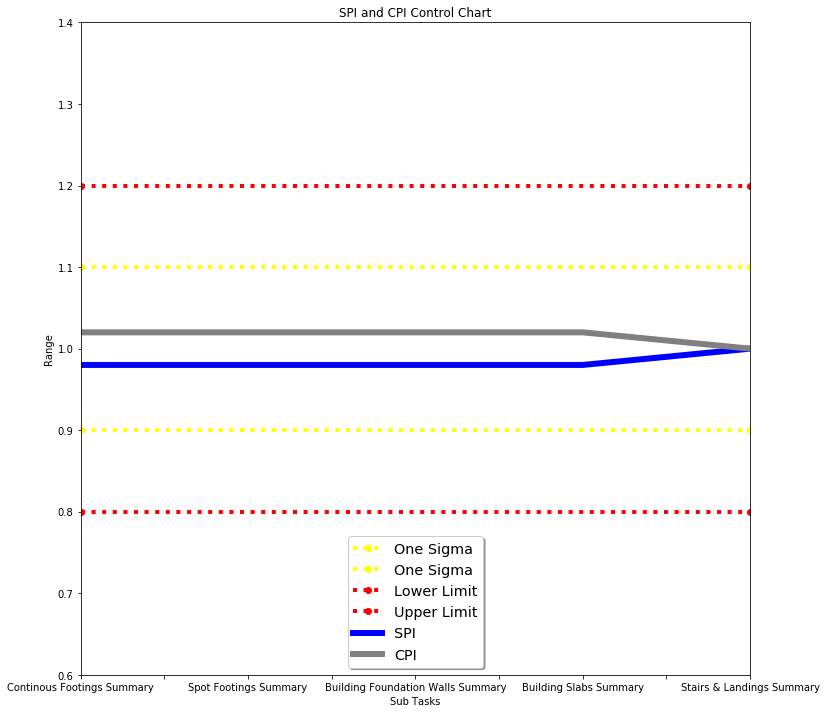

In [24]:
x1, y1 = [0, 4], [0.9, .9]
x2, y2 = [0, 4], [1.1, 1.1]
plt.plot(x1, y1, x2, y2, marker = 'o',c='yellow',ls=':',lw='4')
x3, y3 = [0, 4], [0.8, .8]
x4, y4 = [0, 4], [1.2, 1.2]
plt.plot(x3, y3, x4, y4, marker = 'o',c='red',ls=':',lw='4')
plt.xlim([0, 4])
plt.ylim([.6, 1.4])
p2 = sub_task_summary['SPI'].plot(figsize=(12,12),ls='-',c='Blue',lw='6')
p3 = sub_task_summary['CPI'].plot(figsize=(12,12),ls='-',c='grey',lw='6')
p2.set(title=title,xlabel=xlabel,ylabel=ylabel)
p2.legend(['One Sigma','One Sigma','Lower Limit','Upper Limit','SPI','CPI'],loc='lower center', shadow=True, fontsize='x-large')

In [16]:
sub_task_summary_Output = pd.concat([Continous_Footings_Summary_Output,
                              Spot_Footings_Summary_Output,
                              Building_Foundation_Walls_Summary_Output,
                              Building_Slabs_Summary_Output,
                              Stairs_Landings_Summary_Output], ignore_index=False)

sub_task_summary_Output

,Actual Costs,BAC,CPI,CPI2,EAC,EAC1,EAC2,EAC3,EAC4,EAC5,ETC,EV,Realized Risk,SPI,SPI2
Continous Footings Summary Output,7595.00,10600,1.02,1.02,10850,10392.16,10775.00,10712.65,10776.0,10850.0,3255.00,7420.00,250,0.98,0.98
Spot Footings Summary Output,27125.00,42400,1.02,1.02,43400,41568.63,43025.00,42713.24,43031.0,43400.0,16275.00,26500.00,1000,0.98,0.98
Building Foundation Walls Summary Output,37975.00,74200,1.02,1.02,75950,72745.10,75075.00,74347.55,75090.0,75950.0,37975.00,37100.00,1750,0.98,0.98
Building Slabs Summary Output,75075.49,153700,1.02,1.02,157325,150686.27,155429.85,153854.27,155462.0,157325.0,82249.51,73345.64,3625,0.98,0.98
Stairs Landings Summary Output,0.00,1272,1.00,1.00,1302,1272.00,1272.00,1272.00,1272.0,1302.0,1302.00,0.00,30,1.00,1.00


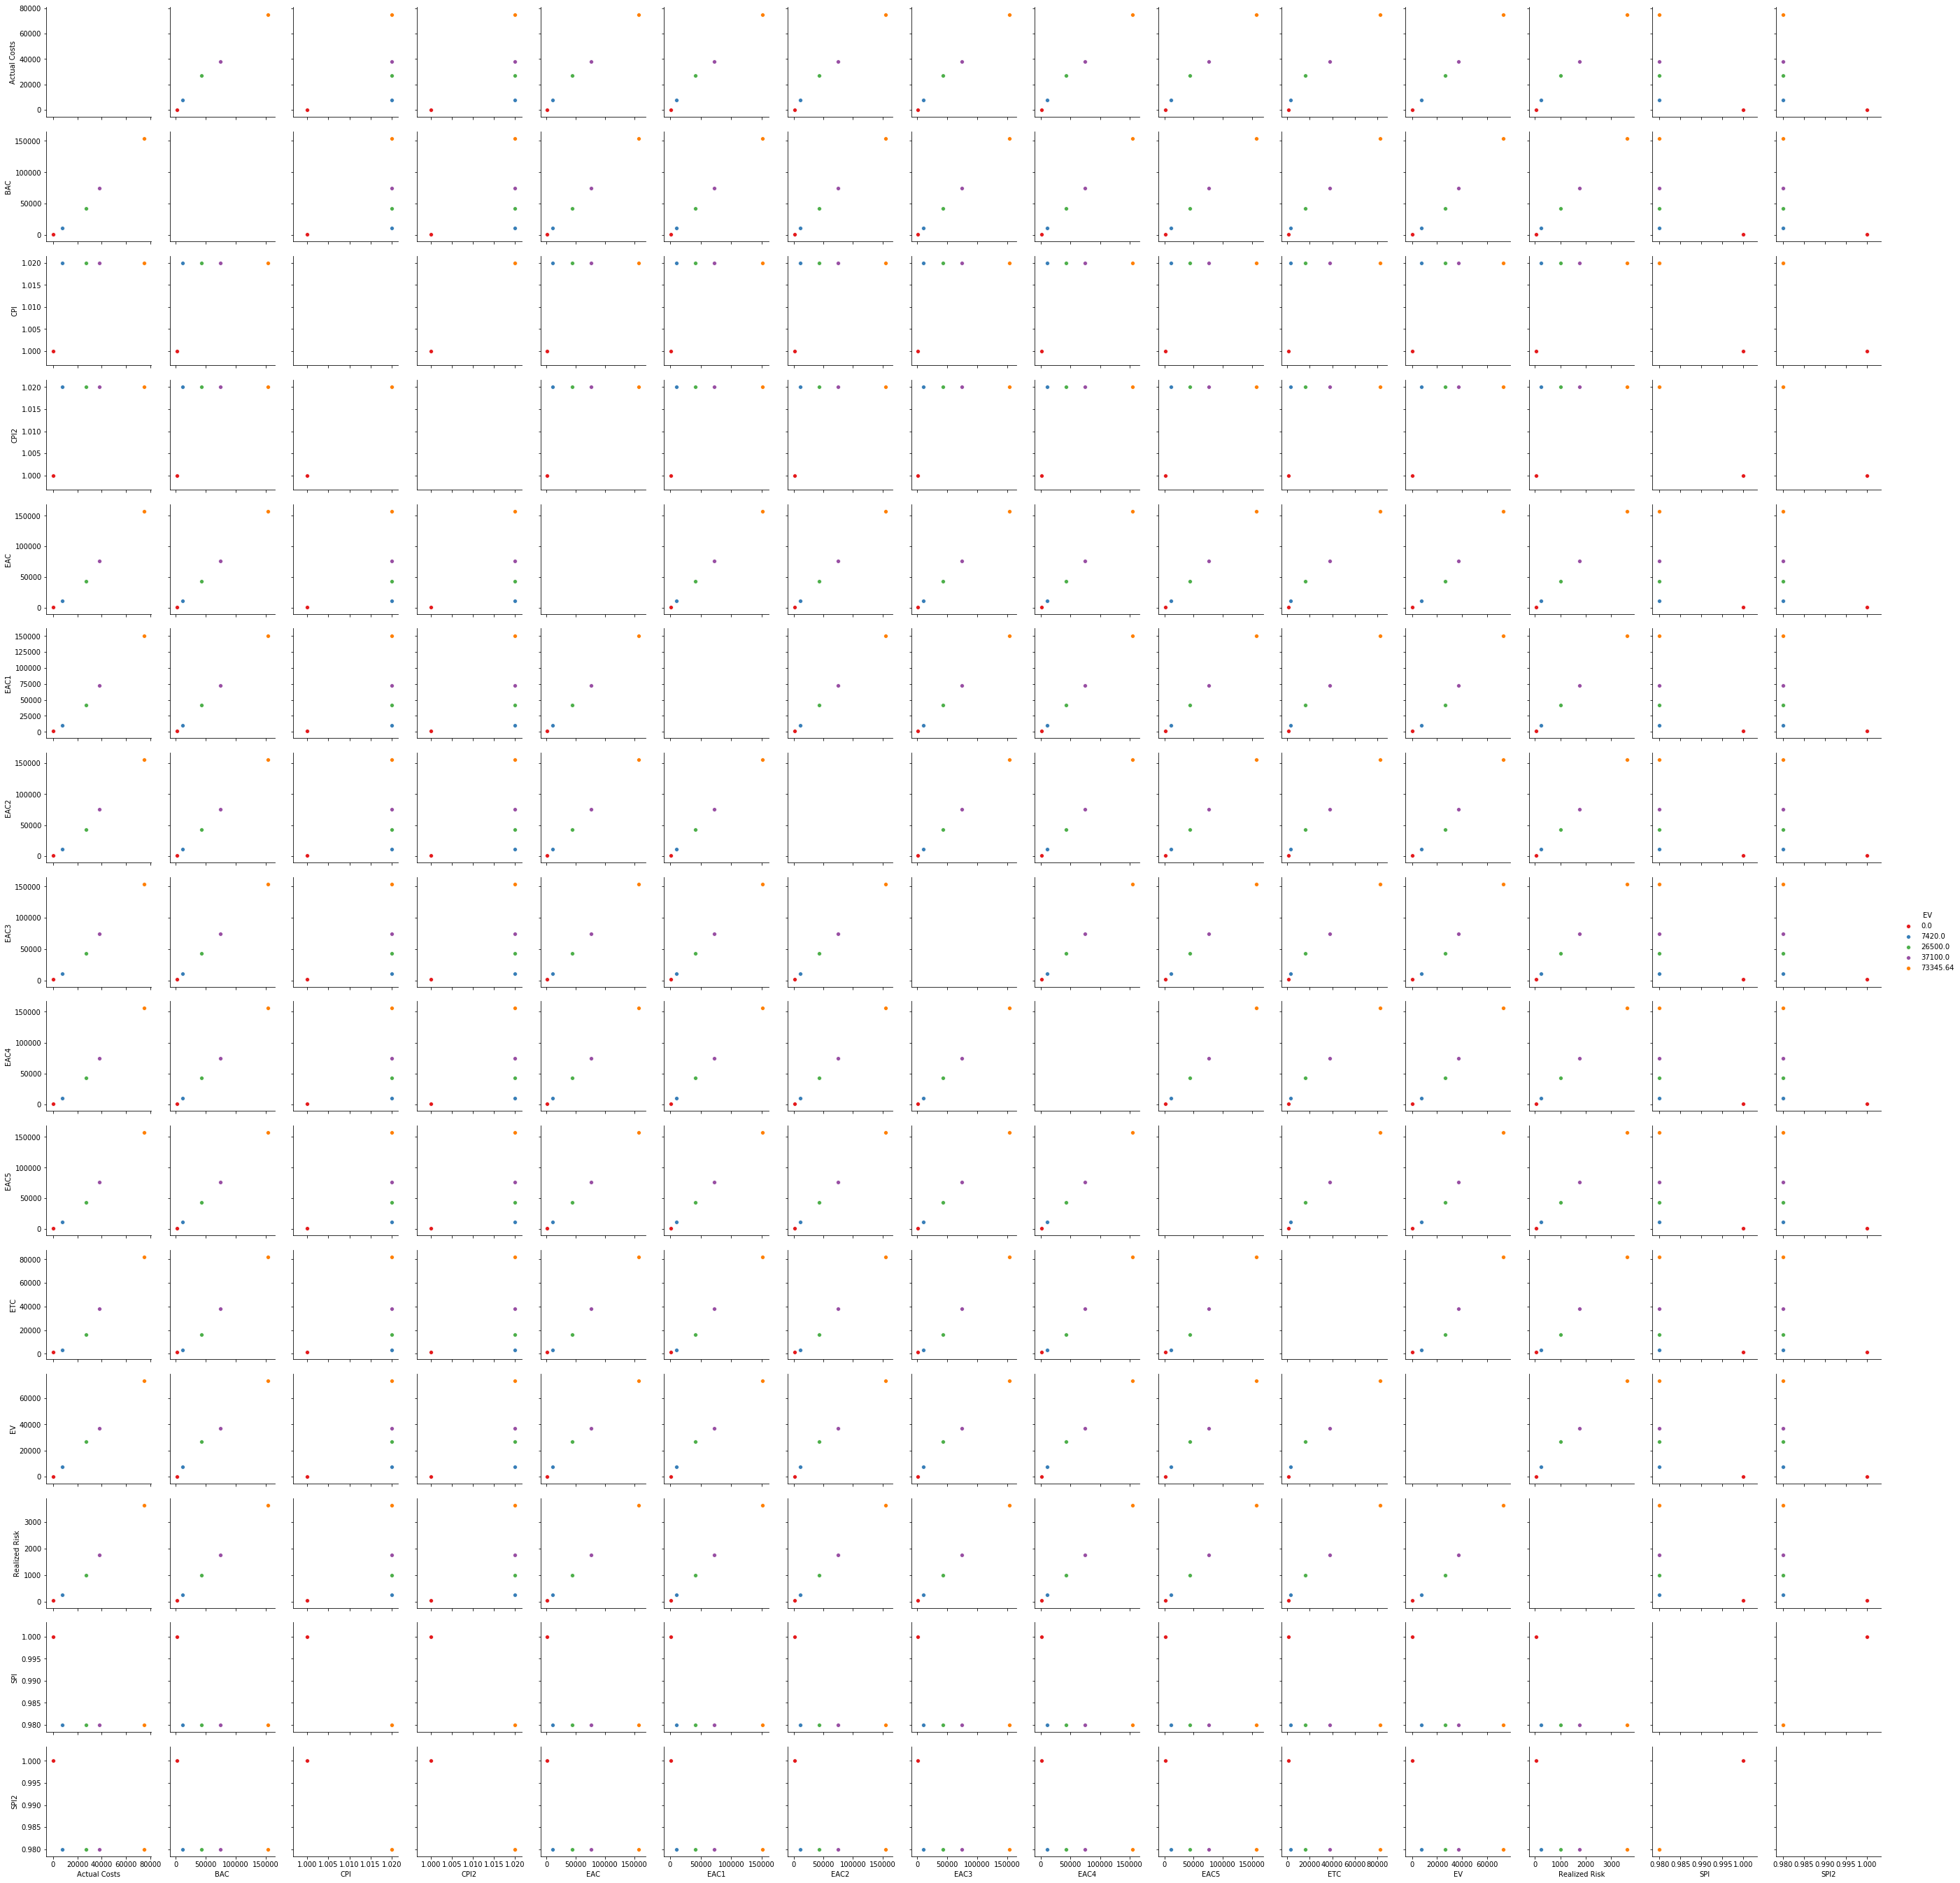

In [18]:
sns.pairplot(sub_task_summary_Output,hue='EV',palette='Set1')

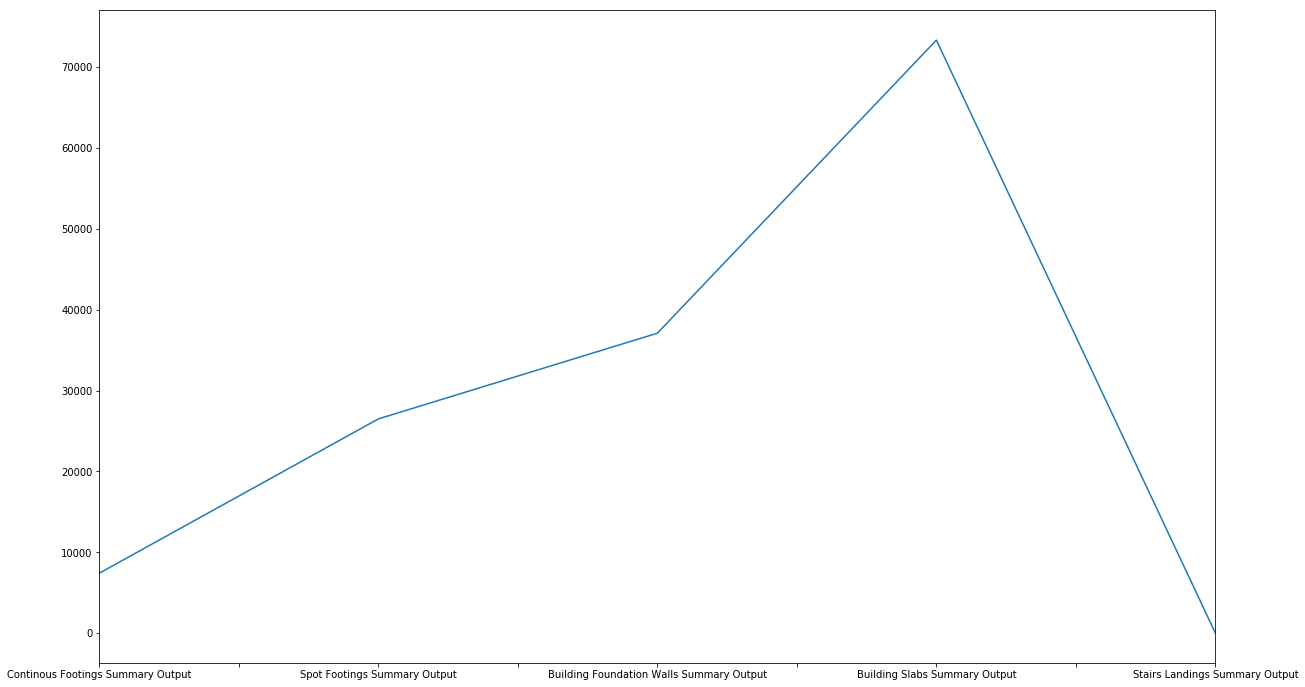

In [20]:
# SIMPLE LINE PLOT
sub_task_summary_Output['EV'].plot(figsize=(20,12));

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

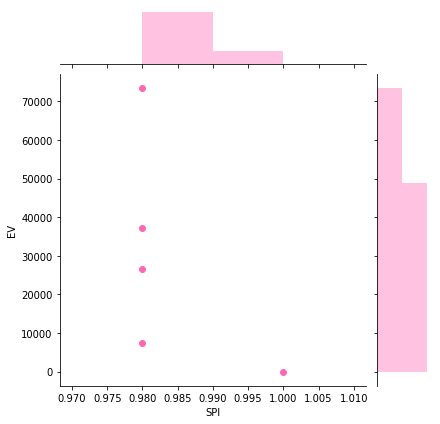

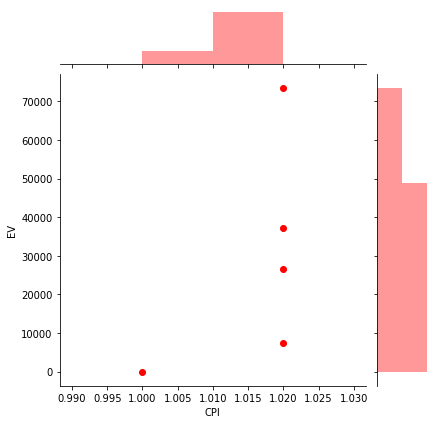

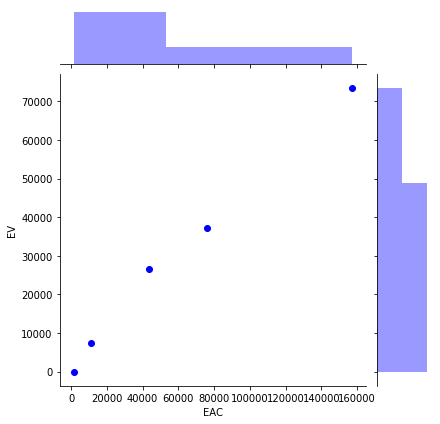

In [65]:
plt.figure(figsize=(12,8))

sns.jointplot(x='SPI',y='EV',data=sub_task_summary_Output,color='hotpink')
sns.jointplot(x='CPI',y='EV',data=sub_task_summary_Output,color='red')
sns.jointplot(x='EAC',y='EV',data=sub_task_summary_Output,color='blue')